In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [9]:
df = pd.read_csv('data/stud.csv')

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
X = df.drop(columns=['math score'],axis=1)

In [12]:
y = df['math score']

In [13]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("oneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [14]:
X = preprocessor.fit_transform(X)

In [19]:
X.shape

(1000, 19)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [21]:
def evaluated_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)

    return mae,rmse,r2_square

In [26]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "k-neighbours regressor": KNeighborsRegressor(),
    "decision tree": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "AdaBoostRegressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2_score = evaluated_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2_score = evaluated_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print("- mean absolute error: {:.4f}".format(model_train_mae))
    print("- root mean squared error: {:.4f}".format(model_train_rmse))
    print("- r2 score: {:.4f}".format(model_train_r2_score))

    print("-------------------------------------------------------")

    print("Model performance for testing set")
    print("- mean absolute error: {:.4f}".format(model_test_mae))
    print("- root mean squared error: {:.4f}".format(model_test_rmse))
    print("- r2 score: {:.4f}".format(model_test_r2_score))

    r2_list.append(model_test_r2_score)

    print('='*35)
    print('\n')

LinearRegression
Model performance for training set
- mean absolute error: 4.2671
- root mean squared error: 5.3244
- r2 score: 0.8743
-------------------------------------------------------
Model performance for testing set
- mean absolute error: 4.2158
- root mean squared error: 5.3960
- r2 score: 0.8803


Lasso
Model performance for training set
- mean absolute error: 5.2063
- root mean squared error: 6.5938
- r2 score: 0.8071
-------------------------------------------------------
Model performance for testing set
- mean absolute error: 5.1579
- root mean squared error: 6.5197
- r2 score: 0.8253


Ridge
Model performance for training set
- mean absolute error: 4.2650
- root mean squared error: 5.3233
- r2 score: 0.8743
-------------------------------------------------------
Model performance for testing set
- mean absolute error: 4.2111
- root mean squared error: 5.3904
- r2 score: 0.8806


k-neighbours regressor
Model performance for training set
- mean absolute error: 4.5167
- ro

In [27]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model name','r2 score']).sort_values(by=['r2 score'],ascending=False)

,model name,r2 score
2,Ridge,0.880593
0,LinearRegression,0.880345
7,CatBoostRegressor,0.851632
5,RandomForestRegressor,0.849466
8,AdaBoostRegressor,0.848608
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,k-neighbours regressor,0.783813
4,decision tree,0.761135


Linear Regression

In [28]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model %.2f" %score)

Accuracy of the model 88.03


Text(0, 0.5, 'Predicted')

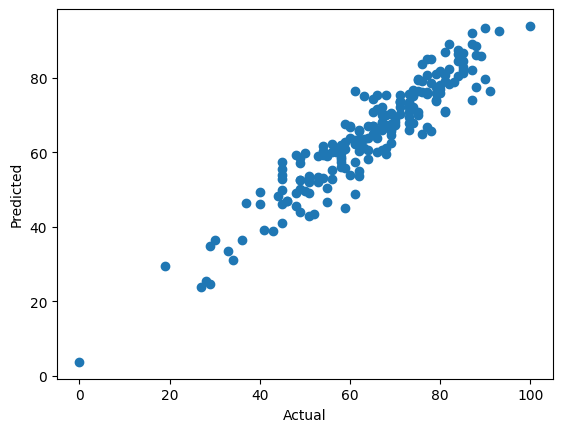

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')